In [20]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [30]:
#Load stock and crypto price files
stock_data = "Resources/all_stock_data.csv"
crypto_data = "Resources/all_crypto_data.csv"

# Create Daily Dataframes
stock_df2 = pd.read_csv(stock_data)
stock_df2['date'] =  pd.to_datetime(stock_df2['date'])
crypto_df2 = pd.read_csv(crypto_data) 
crypto_df2['date'] =  pd.to_datetime(crypto_df2['date'])

# Create stock price DataFrames
stock_df = pd.read_csv(stock_data)
stock_df['date'] =  pd.to_datetime(stock_df['date'])
stock_df['weekday'] = stock_df['date'].dt.weekday
stock_df.set_index('date', inplace=True, drop=True)

crypto_df = pd.read_csv(crypto_data) 
crypto_df['date'] =  pd.to_datetime(crypto_df['date'])
crypto_df['weekday'] = crypto_df['date'].dt.weekday
crypto_df.set_index('date', inplace=True, drop=True)

wkly_crypto_df = crypto_df.loc[crypto_df['weekday'] == 1]
wkly_crypto_df.drop(columns='weekday', axis=1,inplace=True)
wkly_crypto_df.columns = ['BTC','XRP','ETH','LTC','EOS','DASH']
wkly_crypto_df = wkly_crypto_df.pct_change(periods=1)

wkly_stock_df = stock_df.loc[stock_df['weekday'] == 1]
wkly_stock_df.drop(columns=['weekday','close_mu'], axis=1,inplace=True)
wkly_stock_df.columns = ['AMD','NVDA']
wkly_stock_df = wkly_stock_df.pct_change()

## Project Overview
The goal for this project is to analyze the price changes in graphics cards over the last two years in comparison to price changes in cryptocurrencies.  The expectation is that there is a direct correlation in the price fluctuations between the hardware and cryptocurrencies.  Stock price changes for the companies that manufacture graphics cards will also be compared to cryptocurrency price changes.

### Questions
* What is the correlation between GPU prices and cryptocurrency prices? 
* Is there a correlation between cryptocurrency prices and stock prices for companies that manufacture GPUs?

### Conclusions
* The cryptocurrencies included in this study showed similar trends in price and percent change over the period analyzed.
* The decline in in cryptos began a couple of months earlier than the decline in stock prices. 
* TBD
* TBD
* TBD

### Daily Price Comparison Across Cryptos
* All cryptos followed a similar increase and decrease in price from Jan 2017 - Dec 2018.
* The peak price across all cryptos included in this analysis was in Dec 2017.

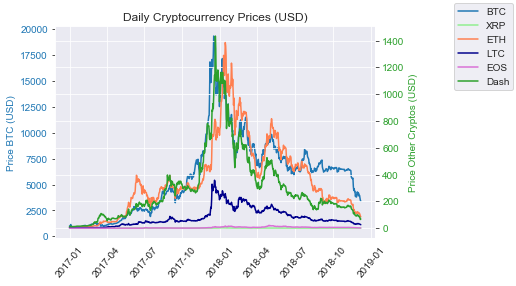

In [31]:
# Price chart of selected cryptos
fig, ax1 = plt.subplots()
ax1.set_title('Daily Cryptocurrency Prices (USD)')
sns.set_style('darkgrid')
ax1.grid(axis='y')
color = 'tab:blue'
ax1.set_ylabel('Price BTC (USD)', color=color)
ax1.plot(crypto_df2['date'], crypto_df2['close_btc'], color=color,label="BTC")
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=50)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.grid(axis='x')
sns.set_style('darkgrid')
ax2.set_ylabel('Price Other Cryptos (USD)', color=color)  
ax2.plot(crypto_df2['date'], crypto_df2['close_xrp'],color='lightgreen',label="XRP")
ax2.plot(crypto_df2['date'], crypto_df2['close_eth'],color='coral', label="ETH")
ax2.plot(crypto_df2['date'], crypto_df2['close_ltc'],color='darkblue', label="LTC")
ax2.plot(crypto_df2['date'], crypto_df2['close_eos'],color='orchid', label="EOS")
ax2.plot(crypto_df2['date'], crypto_df2['close_dash'],color=color,label="Dash")
ax2.tick_params(axis='y', labelcolor=color)
fig.legend(bbox_to_anchor=(1.2, 1.0))
fig.tight_layout() 
fig.savefig("Images/daily_prices_crypto.png")

### Weekly Percent Change Comparison Across Cryptos
* All cryptos followed a similar increase and decrease in percent change from Jan 2017 - Dec 2018.
* Ripple and Litecoin had the most significant spikes within the timeframe analyzed.

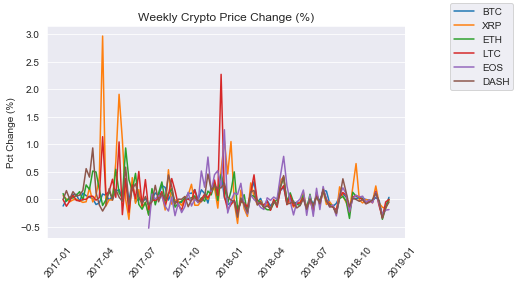

In [32]:
# Chart Weekly Pct Change for Cryptos
fig, ax = plt.subplots()
ax.grid(axis='x')
sns.set_style('darkgrid')
ax.set_title('Weekly Crypto Price Change (%)')
ax.set_ylabel('Pct Change (%)')
ax.plot(wkly_crypto_df)
plt.xticks(rotation=50)
fig.legend(['BTC','XRP','ETH','LTC','EOS','DASH'],bbox_to_anchor=(1.2, 1.0))
fig.tight_layout() 

### Daily Price Comparison Across Stocks¶
* NVDA and AMD stock prices continued to climb after the Dec 2017 peak for cryptos.  The highest prices were in Sept and Oct 2018.
* Invidia and AMD began to decline in price after Oct 2018.  In Nov 2018 they started to go up again.

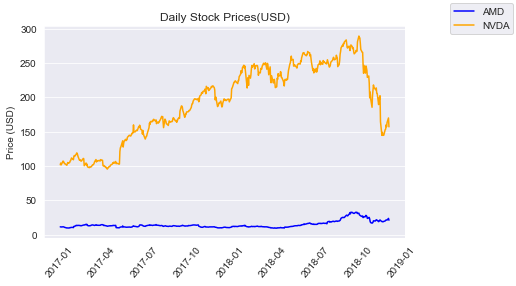

In [36]:
# Chart of selected stocks
fig, ax = plt.subplots()
ax.grid(axis='x')
sns.set_style('darkgrid')
ax.set_title('Daily Stock Prices(USD)')
ax.set_ylabel('Price (USD)')
ax.plot(stock_df2['date'], stock_df2['close_amd'], color='blue', label='AMD')
ax.plot(stock_df2['date'], stock_df2['close_nvda'], color='orange',label='NVDA')
ax.tick_params(axis='y')
plt.xticks(rotation=50)
fig.legend(bbox_to_anchor=(1.2, 1.0))
fig.tight_layout() 
fig.savefig("Images/daily_prices_stock.png")

### Weekly Percent Change Across Stocks¶
* NVDA and AMD stock prices spiked April 2017. There was a similar spike in cryptos at that time. Oct and Nov 2018 were also volatile months for both companies.

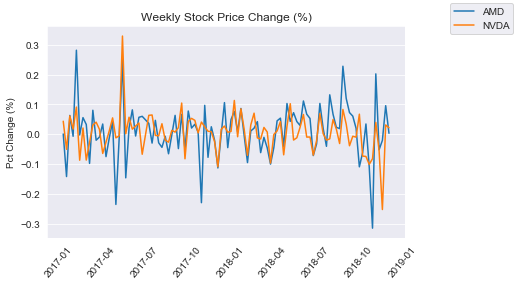

In [37]:
# Chart Weekly Pct Change for Stocks
fig, ax = plt.subplots()
ax.grid(axis='x')
sns.set_style('darkgrid')
ax.set_title('Weekly Stock Price Change (%)')
ax.set_ylabel('Pct Change (%)')
ax.plot(wkly_stock_df)
plt.xticks(rotation=50)
fig.legend(['AMD','NVDA','MU'],bbox_to_anchor=(1.2, 1.0))
fig.tight_layout() 

### Daily Price Comparison - BTC and Stocks¶
* BTC peaks in Dec 2018 while the stocks continue to rise until Oct 2018.
* BTC continues to fall along with stock prices after Oct 2018.

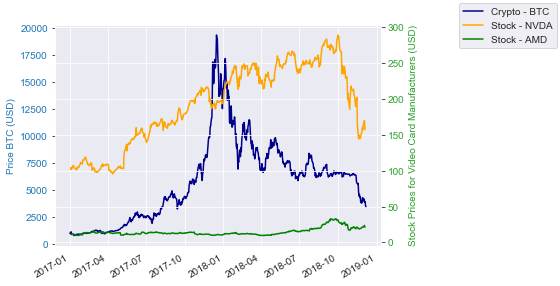

In [39]:
# Compare Bitcoin with Stock Prices
fig, ax1 = plt.subplots()
sns.set_style('darkgrid')
color = 'tab:blue'
ax1.grid(axis='y')
ax1.set_ylabel('Price BTC (USD)', color=color)
ax1.plot(crypto_df2['date'], crypto_df2['close_btc'], color='darkblue', label="Crypto - BTC")
ax1.tick_params(axis='y', labelcolor=color)
fig.autofmt_xdate()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
sns.set_style('darkgrid')
ax2.grid(axis='x')
ax2.set_ylabel('Stock Prices for Video Card Manufacturers (USD)', color=color)  
ax2.plot(stock_df2['date'], stock_df2['close_nvda'],color='orange',label="Stock - NVDA")
ax2.plot(stock_df2['date'], stock_df2['close_amd'],color='green',label="Stock - AMD")
ax2.tick_params(axis='y', labelcolor=color)
fig.legend(bbox_to_anchor=(1.3, 1.0))
fig.tight_layout()
fig.savefig("Images/daily_prices_btc_stocks.png")

### Daily Price Comparison - ETH and Stocks¶
* ETH follows a similar pattern to BTC, but peaks slightly later in Jan 2018 before it begins a significant drop.

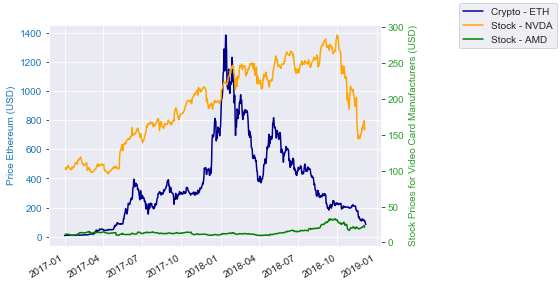

In [41]:
# Compare Ethereum with Stock Prices
fig, ax1 = plt.subplots()

color = 'tab:blue'
sns.set_style('darkgrid')
ax1.set_ylabel('Price Ethereum (USD)', color=color)
ax1.plot(crypto_df2['date'], crypto_df2['close_eth'], color='darkblue',label="Crypto - ETH")
ax1.tick_params(axis='y', labelcolor=color)
fig.autofmt_xdate()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.grid(axis='both')
ax2.set_ylabel('Stock Prices for Video Card Manufacturers (USD)', color=color)  
ax2.plot(stock_df2['date'], stock_df2['close_nvda'],color='orange', label="Stock - NVDA")
ax2.plot(stock_df2['date'], stock_df2['close_amd'],color='green',label="Stock - AMD")
ax2.tick_params(axis='y', labelcolor=color)
fig.legend(bbox_to_anchor=(1.3, 1.0))
fig.tight_layout()
fig.savefig("Images/daily_prices_eth_stocks.png")

### Weekly Percent Change - NVDA and BTC¶
* Percent Change followed a similar pattern for both except between Oct 2017 to Mar 2018 where they were moving in opposite directions.

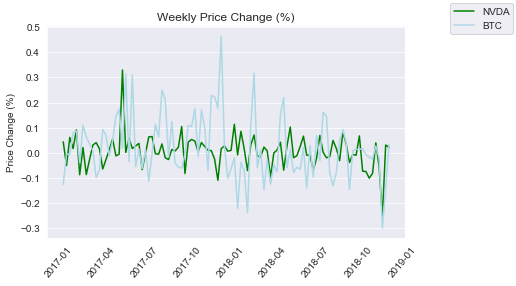

In [42]:
# Chart of BTC and NVDA
fig, ax = plt.subplots()
ax.grid(axis='x')
sns.set_style('darkgrid')
ax.set_title('Weekly Price Change (%)')
ax.set_ylabel('Price Change (%)')
ax.plot(wkly_stock_df.index, wkly_stock_df['NVDA'], color='green', label='NVDA')
ax.plot(wkly_crypto_df.index, wkly_crypto_df['BTC'], color='lightblue', label='BTC')
ax.tick_params(axis='y')
plt.xticks(rotation=50)
fig.legend(bbox_to_anchor=(1.2, 1.0))
fig.tight_layout() 

### Weekly Percent Change - NVDA and ETH¶
* There were several periods where the percent change moved in a different direction, but they were shorter in duration than the percent changes with BTC and NVDA.

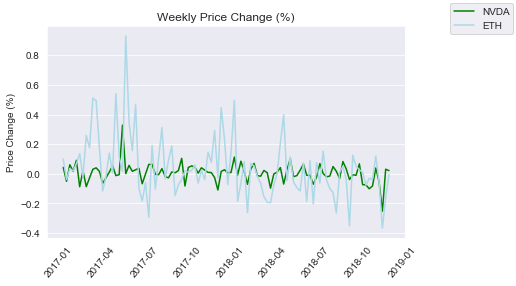

In [43]:
# Chart of XRP and NVDA
fig, ax = plt.subplots()
ax.grid(axis='x')
sns.set_style('darkgrid')
ax.set_title('Weekly Price Change (%)')
ax.set_ylabel('Price Change (%)')
ax.plot(wkly_stock_df.index, wkly_stock_df['NVDA'], color='green', label='NVDA')
ax.plot(wkly_crypto_df.index, wkly_crypto_df['ETH'], color='lightblue', label='ETH')
ax.tick_params(axis='y')
plt.xticks(rotation=50)
fig.legend(bbox_to_anchor=(1.2, 1.0))
fig.tight_layout() 